In [1]:
#importing basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
#importing the data

data = pd.read_csv("Chennai houseing sale.csv")

In [3]:
#taking a view of the first five rows

data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [4]:
#checking the information of the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [5]:
#checking the number of unique values in each column

for col in data.columns:
    print('number of unique cols in ', col, ' is ', data[col].nunique())

number of unique cols in  PRT_ID  is  7109
number of unique cols in  AREA  is  17
number of unique cols in  INT_SQFT  is  1699
number of unique cols in  DATE_SALE  is  2798
number of unique cols in  DIST_MAINROAD  is  201
number of unique cols in  N_BEDROOM  is  4
number of unique cols in  N_BATHROOM  is  2
number of unique cols in  N_ROOM  is  5
number of unique cols in  SALE_COND  is  9
number of unique cols in  PARK_FACIL  is  3
number of unique cols in  DATE_BUILD  is  5808
number of unique cols in  BUILDTYPE  is  5
number of unique cols in  UTILITY_AVAIL  is  5
number of unique cols in  STREET  is  5
number of unique cols in  MZZONE  is  6
number of unique cols in  QS_ROOMS  is  31
number of unique cols in  QS_BATHROOM  is  31
number of unique cols in  QS_BEDROOM  is  31
number of unique cols in  QS_OVERALL  is  479
number of unique cols in  REG_FEE  is  7038
number of unique cols in  COMMIS  is  7011
number of unique cols in  SALES_PRICE  is  7057


In [6]:
#converting the DATE_SALE and DATE_BUILD column to date datatype

data['DATE_SALE'] = pd.to_datetime(data['DATE_SALE'])
data['DATE_BUILD'] = pd.to_datetime(data['DATE_BUILD'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7109 non-null   object        
 1   AREA           7109 non-null   object        
 2   INT_SQFT       7109 non-null   int64         
 3   DATE_SALE      7109 non-null   datetime64[ns]
 4   DIST_MAINROAD  7109 non-null   int64         
 5   N_BEDROOM      7108 non-null   float64       
 6   N_BATHROOM     7104 non-null   float64       
 7   N_ROOM         7109 non-null   int64         
 8   SALE_COND      7109 non-null   object        
 9   PARK_FACIL     7109 non-null   object        
 10  DATE_BUILD     7109 non-null   datetime64[ns]
 11  BUILDTYPE      7109 non-null   object        
 12  UTILITY_AVAIL  7109 non-null   object        
 13  STREET         7109 non-null   object        
 14  MZZONE         7109 non-null   object        
 15  QS_ROOMS       7109 n

In [8]:
#checking the number of unique element in the object datatype column to help in encoding

for col in data.select_dtypes(include=['object']):
    print('number of unique element in ', col, ' is ', data[col].nunique())

number of unique element in  PRT_ID  is  7109
number of unique element in  AREA  is  17
number of unique element in  SALE_COND  is  9
number of unique element in  PARK_FACIL  is  3
number of unique element in  BUILDTYPE  is  5
number of unique element in  UTILITY_AVAIL  is  5
number of unique element in  STREET  is  5
number of unique element in  MZZONE  is  6


In [9]:
#taking a view of the unique values in each object column except the PRT_ID column

for col in data.select_dtypes(include=['object']).columns.difference(['PRT_ID']):
    print('unique element in ', col, ' are ', data[col].unique())

unique element in  AREA  are  ['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']
unique element in  BUILDTYPE  are  ['Commercial' 'Others' 'Other' 'House' 'Comercial']
unique element in  MZZONE  are  ['A' 'RH' 'RL' 'I' 'C' 'RM']
unique element in  PARK_FACIL  are  ['Yes' 'No' 'Noo']
unique element in  SALE_COND  are  ['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']
unique element in  STREET  are  ['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']
unique element in  UTILITY_AVAIL  are  ['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']


In [10]:
#taking a view of the unique values in each object column and their numbers except the PRT_ID column

for col in data.select_dtypes(include=['object']).columns.difference(['PRT_ID']):
    print(data[col].value_counts())

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chormpet         6
Chrmpet          6
TNagar           5
Ana Nagar        3
Karapakam        3
Ann Nagar        2
Velchery         2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64
House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64
RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64
Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64
AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64
Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64
AllPub     1886
NoSeWa     1871
NoSewr  

# Data Cleaning

In [11]:
#changing the All Pub to AllPub in the UTILITY_AVAIL column

data['UTILITY_AVAIL'] = data['UTILITY_AVAIL'].replace('All Pub', 'AllPub')

In [12]:
#changing the Pavd to Paved and NoAcess to No Access in the STREET column

data['STREET'] = data["STREET"].replace("Pavd", "Paved")
data['STREET'] = data["STREET"].replace("NoAccess", "No Access")

In [13]:
#changing the misspelt individual values to the correct ones in the SALE_COND column

data['SALE_COND'] = data["SALE_COND"].replace("Partiall", "Partial")
data['SALE_COND'] = data["SALE_COND"].replace("PartiaLl", "Partial")

data['SALE_COND'] = data["SALE_COND"].replace("Adj Land", "AdjLand")

data['SALE_COND'] = data["SALE_COND"].replace("Ab Normal", "AbNormal")

In [14]:
#changing the Noo to No in the PARK_FACIL column

data["PARK_FACIL"] = data["PARK_FACIL"].replace("Noo", "No")

In [15]:
#changing the mispelt values to the correct ones in the BUILD_TYPE column

data["BUILDTYPE"] = data["BUILDTYPE"].replace("Comercial", "Commercial")

data["BUILDTYPE"] = data["BUILDTYPE"].replace("Other", "Others")

In [16]:
#making the needed corrections in the AREA column

#correcting all mispelt Chrompet values
data["AREA"] = data["AREA"].replace("Chrompt","Chrompet")
data["AREA"] = data["AREA"].replace("Chormpet","Chrompet")
data["AREA"] = data["AREA"].replace("Chrmpet","Chrompet")

#correcting all mispelt Karapakkam values
data["AREA"] = data["AREA"].replace("Karapakam","Karapakkam")

#correcting all mispelt KK Nagar values
data["AREA"] = data["AREA"].replace("KKNagar","KK Nagar")

#correcting all mispelt Velachery values
data["AREA"] = data["AREA"].replace("Velchery","Velachery")

#correcting all mispelt Anna Nagar values
data["AREA"] = data["AREA"].replace("Ana Nagar","Anna Nagar")
data["AREA"] = data["AREA"].replace("Ann Nagar","Anna Nagar")

#correcting all mispelt Adyar values
data["AREA"] = data["AREA"].replace("Adyr","Adyar")

#correcting all mispelt T Nagar values
data["AREA"] = data["AREA"].replace("TNagar","T Nagar")

In [17]:
for col in data.select_dtypes(include=['object']).columns.difference(['PRT_ID']):
    print(data[col].value_counts())

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64
House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64
RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64
Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64
AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64
Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64
AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64


In [18]:
#filling the missing values in the N_BEDROOM, N_BATHROOM and QS_OVERALL with their respective mode

data["N_BATHROOM"] = data["N_BATHROOM"].replace(np.nan, 1.0)

data["N_BEDROOM"] = data["N_BEDROOM"].replace(np.nan, 1.0)

data["QS_OVERALL"] = data["QS_OVERALL"].replace(np.nan, 3.540)

In [19]:
#extracting the date and month from the DATE_SOLD and DATE_BUILD columns

data['YEAR_SOLD'] = data["DATE_SALE"].dt.year
data["MONTH_SOLD"] = data["DATE_SALE"].dt.month

data["YEAR_BUILD"] = data["DATE_BUILD"].dt.year
data["MONTH_BUILD"] = data["DATE_BUILD"].dt.month

In [20]:
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,YEAR_SOLD,MONTH_SOLD,YEAR_BUILD,MONTH_BUILD
0,P03210,Karapakkam,1004,2011-04-05,131,1.0,1.0,3,AbNormal,Yes,...,3.9,4.9,4.330,380000,144400,7600000,2011,4,1967,5
1,P09411,Anna Nagar,1986,2006-12-19,26,2.0,1.0,5,AbNormal,No,...,4.2,2.5,3.765,760122,304049,21717770,2006,12,1995,12
2,P01812,Adyar,909,2012-04-02,70,1.0,1.0,3,AbNormal,Yes,...,3.8,2.2,3.090,421094,92114,13159200,2012,4,1992,9
3,P05346,Velachery,1855,2010-03-13,14,3.0,2.0,5,Family,No,...,3.9,3.6,4.010,356321,77042,9630290,2010,3,1988,3
4,P06210,Karapakkam,1226,2009-05-10,84,1.0,1.0,3,AbNormal,Yes,...,2.5,4.1,3.290,237000,74063,7406250,2009,5,1979,10


In [21]:
data.tail()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,YEAR_SOLD,MONTH_SOLD,YEAR_BUILD,MONTH_BUILD
7104,P03834,Karapakkam,598,2011-03-01,51,1.0,1.0,2,AdjLand,No,...,2.2,2.4,2.52,208767,107060,5353000,2011,3,1962,1
7105,P10000,Velachery,1897,2004-08-04,52,3.0,2.0,5,Family,Yes,...,4.5,3.3,3.92,346191,205551,10818480,2004,8,1995,11
7106,P09594,Velachery,1614,2006-08-25,152,2.0,1.0,4,Normal Sale,No,...,4.2,2.9,3.84,317354,167028,8351410,2006,8,1978,1
7107,P06508,Karapakkam,787,2009-03-08,40,1.0,1.0,2,Partial,Yes,...,3.8,4.1,4.16,425350,119098,8507000,2009,3,1977,11
7108,P09794,Velachery,1896,2005-07-13,156,3.0,2.0,5,Partial,Yes,...,3.5,4.3,3.64,349177,79812,9976480,2005,7,1961,7


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7109 non-null   object        
 1   AREA           7109 non-null   object        
 2   INT_SQFT       7109 non-null   int64         
 3   DATE_SALE      7109 non-null   datetime64[ns]
 4   DIST_MAINROAD  7109 non-null   int64         
 5   N_BEDROOM      7109 non-null   float64       
 6   N_BATHROOM     7109 non-null   float64       
 7   N_ROOM         7109 non-null   int64         
 8   SALE_COND      7109 non-null   object        
 9   PARK_FACIL     7109 non-null   object        
 10  DATE_BUILD     7109 non-null   datetime64[ns]
 11  BUILDTYPE      7109 non-null   object        
 12  UTILITY_AVAIL  7109 non-null   object        
 13  STREET         7109 non-null   object        
 14  MZZONE         7109 non-null   object        
 15  QS_ROOMS       7109 n

In [23]:
data["BuildSoldDiff"] =  data["YEAR_SOLD"] - data["YEAR_BUILD"]

In [24]:
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,YEAR_SOLD,MONTH_SOLD,YEAR_BUILD,MONTH_BUILD,BuildSoldDiff
0,P03210,Karapakkam,1004,2011-04-05,131,1.0,1.0,3,AbNormal,Yes,...,4.9,4.330,380000,144400,7600000,2011,4,1967,5,44
1,P09411,Anna Nagar,1986,2006-12-19,26,2.0,1.0,5,AbNormal,No,...,2.5,3.765,760122,304049,21717770,2006,12,1995,12,11
2,P01812,Adyar,909,2012-04-02,70,1.0,1.0,3,AbNormal,Yes,...,2.2,3.090,421094,92114,13159200,2012,4,1992,9,20
3,P05346,Velachery,1855,2010-03-13,14,3.0,2.0,5,Family,No,...,3.6,4.010,356321,77042,9630290,2010,3,1988,3,22
4,P06210,Karapakkam,1226,2009-05-10,84,1.0,1.0,3,AbNormal,Yes,...,4.1,3.290,237000,74063,7406250,2009,5,1979,10,30


In [25]:
data.tail()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,YEAR_SOLD,MONTH_SOLD,YEAR_BUILD,MONTH_BUILD,BuildSoldDiff
7104,P03834,Karapakkam,598,2011-03-01,51,1.0,1.0,2,AdjLand,No,...,2.4,2.52,208767,107060,5353000,2011,3,1962,1,49
7105,P10000,Velachery,1897,2004-08-04,52,3.0,2.0,5,Family,Yes,...,3.3,3.92,346191,205551,10818480,2004,8,1995,11,9
7106,P09594,Velachery,1614,2006-08-25,152,2.0,1.0,4,Normal Sale,No,...,2.9,3.84,317354,167028,8351410,2006,8,1978,1,28
7107,P06508,Karapakkam,787,2009-03-08,40,1.0,1.0,2,Partial,Yes,...,4.1,4.16,425350,119098,8507000,2009,3,1977,11,32
7108,P09794,Velachery,1896,2005-07-13,156,3.0,2.0,5,Partial,Yes,...,4.3,3.64,349177,79812,9976480,2005,7,1961,7,44


In [26]:
data["season"] = data["MONTH_SOLD"]

In [27]:
#Grouping the months into summer, monsoon, winter and cool

for col in data["season"]:
    if col in [3, 4, 5, 6]:
        data["season"] = data["season"].replace(col, "summer")
    elif col in[7, 8, 9]:
        data["season"] = data["season"].replace(col, "monsoon")
    elif col in [1, 2, 11, 12]:
        data["season"] = data["season"].replace(col, "winter")
    else:
        data["season"] = data["season"].replace(col, "cool")

In [28]:
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,YEAR_SOLD,MONTH_SOLD,YEAR_BUILD,MONTH_BUILD,BuildSoldDiff,season
0,P03210,Karapakkam,1004,2011-04-05,131,1.0,1.0,3,AbNormal,Yes,...,4.330,380000,144400,7600000,2011,4,1967,5,44,summer
1,P09411,Anna Nagar,1986,2006-12-19,26,2.0,1.0,5,AbNormal,No,...,3.765,760122,304049,21717770,2006,12,1995,12,11,winter
2,P01812,Adyar,909,2012-04-02,70,1.0,1.0,3,AbNormal,Yes,...,3.090,421094,92114,13159200,2012,4,1992,9,20,summer
3,P05346,Velachery,1855,2010-03-13,14,3.0,2.0,5,Family,No,...,4.010,356321,77042,9630290,2010,3,1988,3,22,summer
4,P06210,Karapakkam,1226,2009-05-10,84,1.0,1.0,3,AbNormal,Yes,...,3.290,237000,74063,7406250,2009,5,1979,10,30,summer


# Data Mining(Visualization)

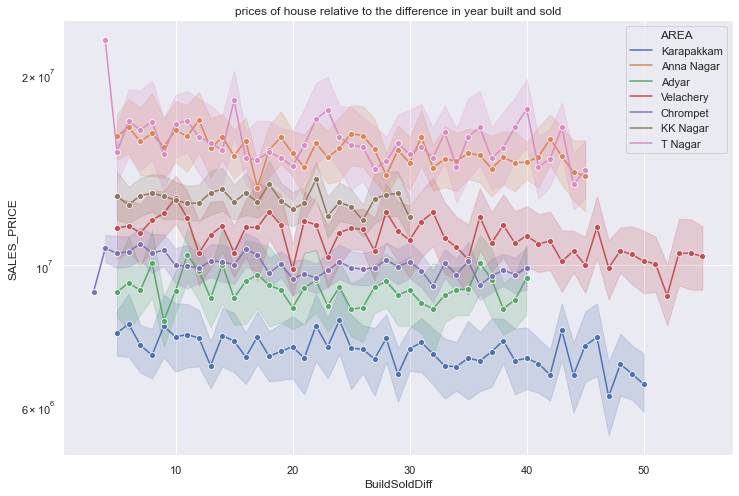

In [29]:
#plotting a line plot of sales_price and difference in year the building was built vs when it was sold grouping them by area

sns.set(rc = {'figure.figsize': (12,8)})

sns.lineplot(x=data.BuildSoldDiff, y=data.SALES_PRICE, data = data, hue=data["AREA"],marker="o")
plt.title("prices of house relative to the difference in year built and sold")
plt.yscale("log")

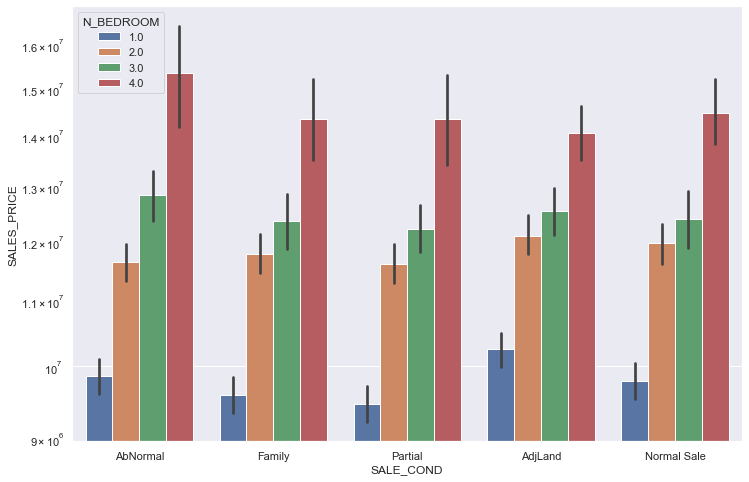

In [30]:
sns.barplot(hue=data.N_BEDROOM ,y=data.SALES_PRICE, x=data.SALE_COND , data=data)
plt.yscale("log")

<AxesSubplot:xlabel='YEAR_SOLD', ylabel='SALES_PRICE'>

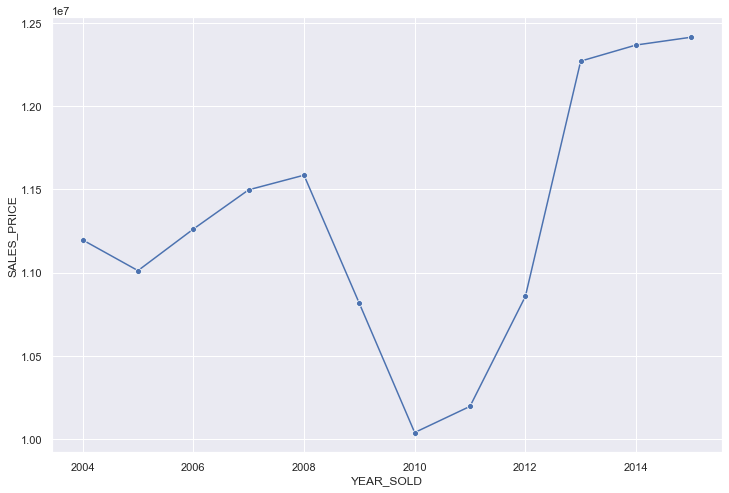

In [31]:
#lineplot of year_sold vs sales_price

sns.lineplot(x=data.YEAR_SOLD, y=data.SALES_PRICE,data=data,marker="o",ci=None)

<AxesSubplot:xlabel='YEAR_BUILD', ylabel='SALES_PRICE'>

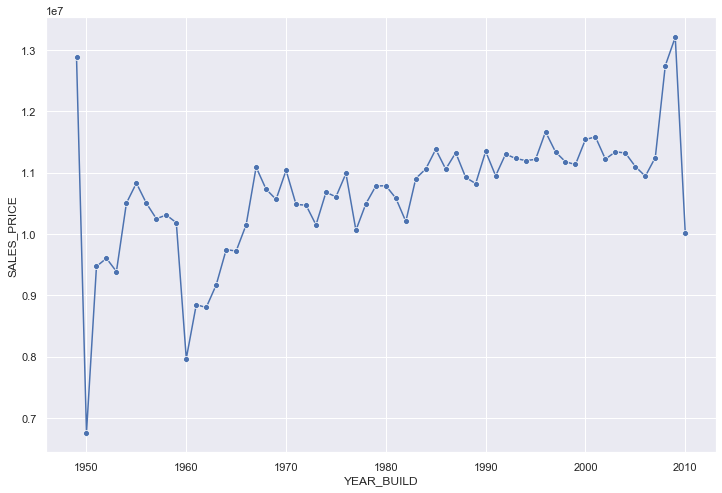

In [32]:
#lineplot of year_build vs sales_price

sns.lineplot(x=data.YEAR_BUILD, y=data.SALES_PRICE,data=data,marker="o",ci=None)

<AxesSubplot:xlabel='REG_FEE', ylabel='SALES_PRICE'>

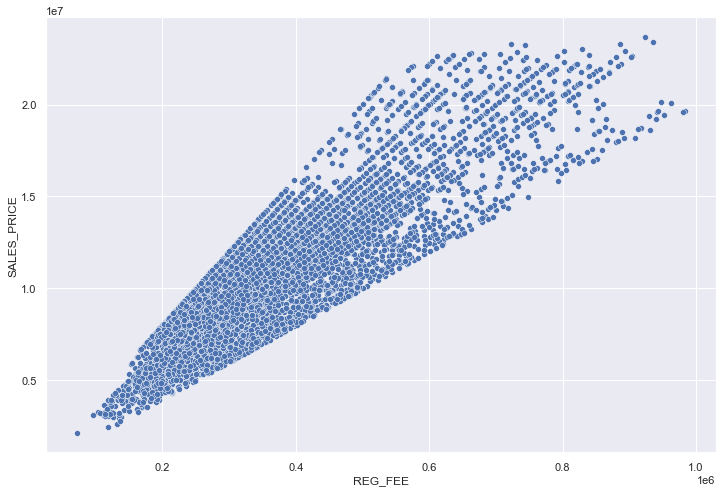

In [33]:
sns.scatterplot(x=data.REG_FEE, y=data.SALES_PRICE)

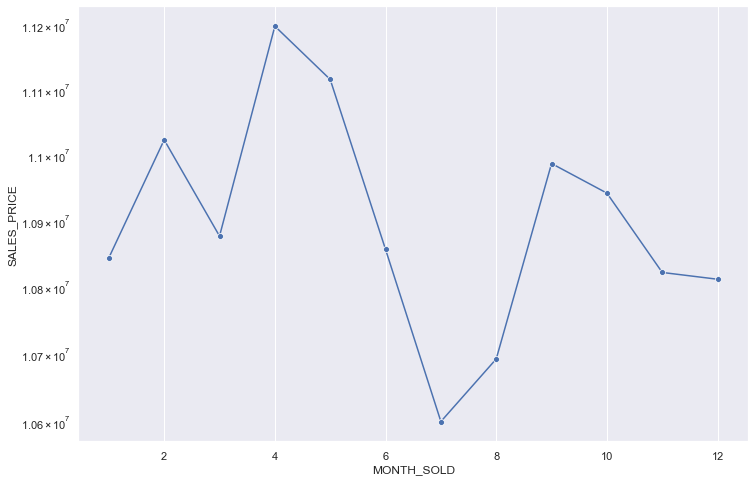

In [34]:
sns.lineplot(x=data.MONTH_SOLD, y=data.SALES_PRICE,marker="o",ci=None)
plt.yscale("log")

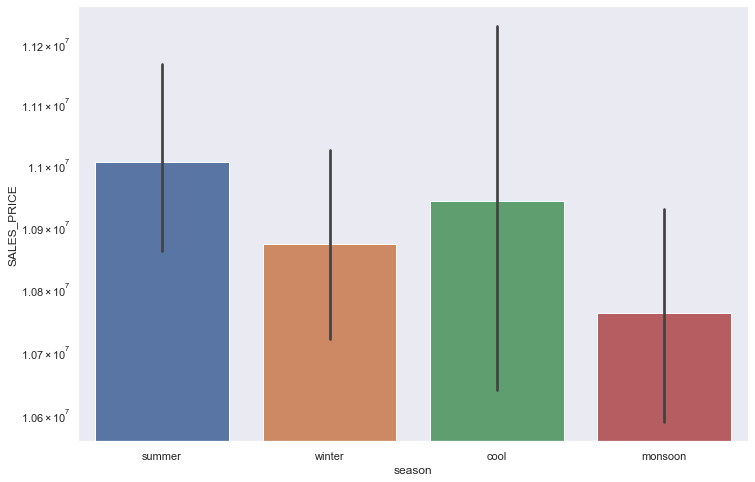

In [35]:
sns.barplot(x=data.season, y=data.SALES_PRICE)
plt.yscale("log")

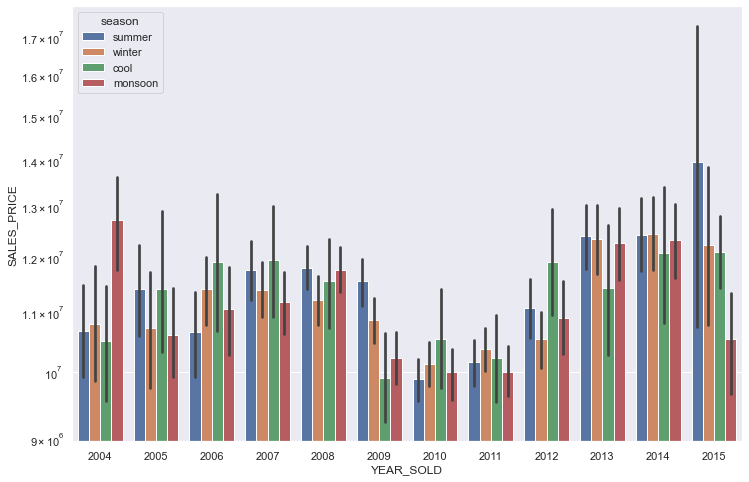

In [36]:
#making a barplot of year_sold and sales_price

sns.barplot(x=data.YEAR_SOLD, y=data.SALES_PRICE, hue=data.season)
plt.yscale("log")

<AxesSubplot:>

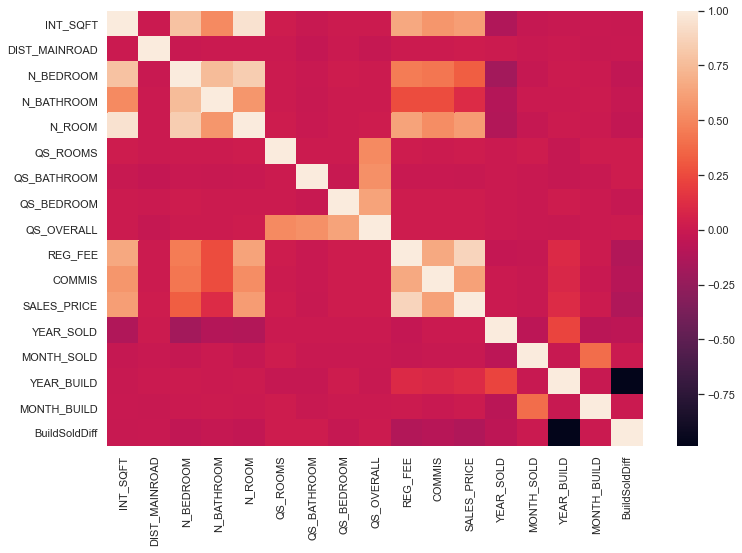

In [37]:
sns.heatmap(data.corr())

In [38]:
data.select_dtypes(include = ["object"]).columns

Index(['PRT_ID', 'AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'season'],
      dtype='object')

# Model Building

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from math import sqrt

In [40]:
Cat_col = ['AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'season']

In [41]:
#encoding the categorical column

for val in Cat_col:
    label = LabelEncoder()
    label.fit(data[val])
    data[val] = label.transform(data[val])

<AxesSubplot:>

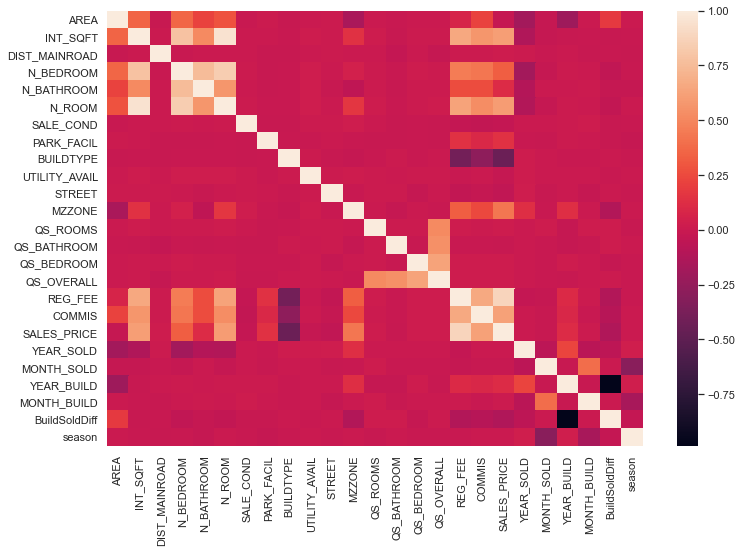

In [42]:
sns.heatmap(data.corr(),annot=False)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7109 non-null   object        
 1   AREA           7109 non-null   int32         
 2   INT_SQFT       7109 non-null   int64         
 3   DATE_SALE      7109 non-null   datetime64[ns]
 4   DIST_MAINROAD  7109 non-null   int64         
 5   N_BEDROOM      7109 non-null   float64       
 6   N_BATHROOM     7109 non-null   float64       
 7   N_ROOM         7109 non-null   int64         
 8   SALE_COND      7109 non-null   int32         
 9   PARK_FACIL     7109 non-null   int32         
 10  DATE_BUILD     7109 non-null   datetime64[ns]
 11  BUILDTYPE      7109 non-null   int32         
 12  UTILITY_AVAIL  7109 non-null   int32         
 13  STREET         7109 non-null   int32         
 14  MZZONE         7109 non-null   int32         
 15  QS_ROOMS       7109 n

In [44]:
#defining the independent and dependent variable

X = data.drop(["PRT_ID","DATE_SALE","DATE_BUILD", "SALES_PRICE"], axis=1) #this gave a MAPE value of 5.3487 and r2_score of 0.967
#X = data[["INT_SQFT","N_BEDROOM","N_ROOM","PARK_FACIL","REG_FEE","COMMIS","BuildSoldDiff","MZZONE","BUILDTYPE"]] #this gave a MAPE value of 6.2552 and r2_score of 0.9549

y = data.SALES_PRICE

In [45]:
X.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,...,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,YEAR_SOLD,MONTH_SOLD,YEAR_BUILD,MONTH_BUILD,BuildSoldDiff,season
0,4,1004,131,1.0,1.0,3,0,1,0,0,...,4.9,4.330,380000,144400,2011,4,1967,5,44,2
1,1,1986,26,2.0,1.0,5,0,0,0,0,...,2.5,3.765,760122,304049,2006,12,1995,12,11,3
2,0,909,70,1.0,1.0,3,0,1,0,1,...,2.2,3.090,421094,92114,2012,4,1992,9,20,2
3,6,1855,14,3.0,2.0,5,2,0,2,3,...,3.6,4.010,356321,77042,2010,3,1988,3,22,2
4,4,1226,84,1.0,1.0,3,0,1,2,0,...,4.1,3.290,237000,74063,2009,5,1979,10,30,2


In [46]:
#splitting the data into test and train set

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [47]:
#defining the model

model = RandomForestRegressor(n_estimators = 700, random_state = 42)

In [48]:
#fitting the model

model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=700, random_state=42)

In [49]:
#making predictions with the test set

y_pred = model.predict(X_test)

In [50]:
print(mean_absolute_error(y_test, y_pred))

521863.7207604983


In [51]:
print(r2_score(y_test, y_pred))

0.9670142338103587


In [52]:
print(sqrt(mean_squared_error(y_test, y_pred)))

658291.2030519645


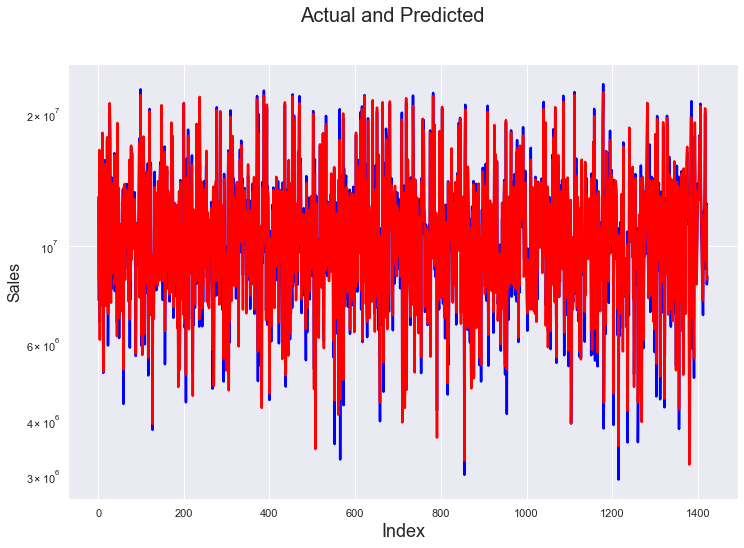

In [53]:
#plot of Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,1423,1)]         # generating index 
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)                       # Y-label
plt.yscale("log")

In [54]:
#function that calculates the mean absolute percentage error

def MAPE(y_actual,y_predicted):
    mape = np.mean(np.abs((y_actual - y_predicted)/y_actual))*100
    return mape

In [55]:
LR_MAPE = MAPE(y_test,y_pred)

In [56]:
print(f"MAPE: {LR_MAPE}")

MAPE: 5.348653215788772


In [57]:
#code to check for feature importance to better the model

feature_importances = pd.DataFrame(model.feature_importances_,
                                  index=X_train.columns,
                                  columns=['Importance']).sort_values('Importance', ascending=False)

In [58]:
feature_importances

,Importance
REG_FEE,0.768177
AREA,0.063571
INT_SQFT,0.056843
BUILDTYPE,0.035922
MZZONE,0.016803
N_BEDROOM,0.015907
N_BATHROOM,0.009915
COMMIS,0.007054
PARK_FACIL,0.002627
DIST_MAINROAD,0.002165
